/tmp/ipython-input-907286196.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')
/tmp/ipython-input-907286196.py:32: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='bfill')


Data Head after preprocessing:
                     pm10  pm2_5  no2  so2  ozone     co  dust   aod
time                                                                
2022-08-16 00:00:00   2.1    1.5  3.8  6.3   39.0  103.0   0.0  0.04
2022-08-16 01:00:00   2.1    1.5  4.6  6.7   37.0  108.0   0.0  0.07
2022-08-16 02:00:00   2.4    1.7  5.7  7.1   34.0  115.0   0.0  0.09
2022-08-16 03:00:00   3.2    2.2  6.7  7.7   32.0  121.0   0.0  0.09
2022-08-16 04:00:00   3.8    2.7  6.6  8.1   32.0  119.0   0.0  0.11

Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27960 entries, 2022-08-16 00:00:00 to 2025-10-23 23:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    27960 non-null  float64
 1   pm2_5   27960 non-null  float64
 2   no2     27960 non-null  float64
 3   so2     27960 non-null  float64
 4   ozone   27960 non-null  float64
 5   co      27960 non-null  float64
 6   dust    27960 non-null  float6

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 48, 100)        │        43,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 48, 100)        │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,251 (602.54 KB)

 Trainable params: 154,251 (602.54 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0068 - val_loss: 0.0200
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0059 - val_loss: 0.0153
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0054 - val_loss: 0.0100
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0040 - val_loss: 0.0069
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0032 - val_loss: 0.0049
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0026 - val_loss: 0.0031
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 9/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 11/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0015 - val_loss: 0.0011
Ep

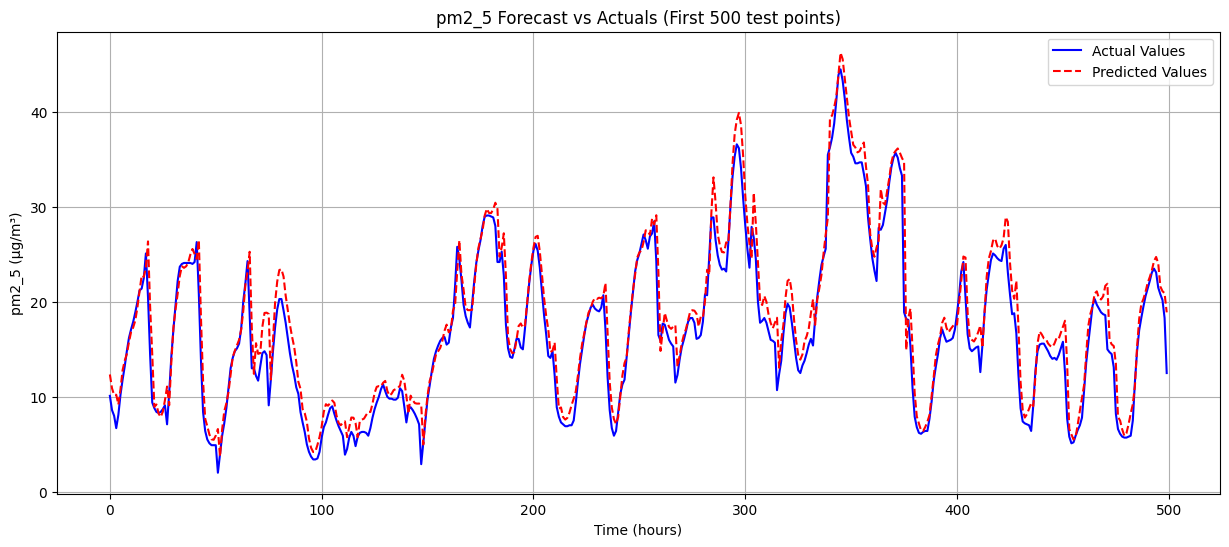

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt

file_name = 'open-meteo-22.50N77.80E375m.csv'
df = pd.read_csv(file_name, skiprows=3)

df['time'] = pd.to_datetime(df['time'])
df = df.set_index('time')

df.columns = [
    'pm10', 'pm2_5', 'no2', 'so2', 'ozone',
    'co2', 'co', 'dust', 'aod'
]

df = df.drop('co2', axis=1)
df = df.fillna(method='ffill')
df = df.fillna(method='bfill')

print("Data Head after preprocessing:")
print(df.head())
print("\nData Info:")
df.info()

TARGET_FEATURE = 'pm2_5'
features = df.columns.tolist()
data = df[features].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)
target_idx = features.index(TARGET_FEATURE)
target_scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler.fit(data[:, target_idx].reshape(-1, 1))

def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:(i + lookback), :])
        y.append(data[i + lookback, target_idx])
    return np.array(X), np.array(y)

LOOKBACK = 48
X, y = create_sequences(scaled_data, LOOKBACK)

print(f"\nShape of X (sequences): {X.shape}")
print(f"Shape of y (targets): {y.shape}")
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"\nTraining set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

y_test_orig = y_test.reshape(-1, 1)
n_features = X_train.shape[2]

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(LOOKBACK, n_features)))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

print("\nStarting model training...")
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=128,
    validation_split=0.1,
    shuffle=False
)
print("Model training finished.")
print("\nEvaluating model...")
predictions_scaled = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions_scaled)
y_test_actual = target_scaler.inverse_transform(y_test_orig)

rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f"\nTest RMSE: {rmse:.4f} (in original units, μg/m³)")
print(f"Mean {TARGET_FEATURE}: {df[TARGET_FEATURE].mean():.4f}")
mae = mean_absolute_error(y_test_actual, predictions)
print(f"Test MAE:  {mae:.4f} (in original units, μg/m³)")
print("Plotting results...")
plot_len = 500

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:plot_len], label='Actual Values', color='blue')
plt.plot(predictions[:plot_len], label='Predicted Values', color='red', linestyle='--')
plt.title(f'{TARGET_FEATURE} Forecast vs Actuals (First {plot_len} test points)')
plt.xlabel('Time (hours)')
plt.ylabel(f'{TARGET_FEATURE} (μg/m³)')
plt.legend()
plt.grid(True)
plt.savefig('pollution_forecast.png')

print(f"\nDone! A plot 'pollution_forecast.png' has been saved.")

# New Section

In [ ]:
import joblib

# 1. Save the trained Keras model
model.save('pollution_model.h5')  # Saves the model architecture and weights

# 2. Save the scalers (CRITICAL!)
# We need these to process new data exactly as the model expects
joblib.dump(scaler, 'full_data_scaler.joblib')
joblib.dump(target_scaler, 'target_scaler.joblib')

# 3. Save the test data and predictions
# We'll use these to build the charts in our app
np.save('y_test_actual.npy', y_test_actual)
np.save('predictions.npy', predictions)

print("All files (model, scalers, test data) have been saved!")

All files (model, scalers, test data) have been saved!
